In [1]:
CONTEXTS = ('aff>neg', 'many>few')
LANGS = ('en', 'ru-ni', 'ru-libo', 'fr', 'tr')
MODELS = ('mbert', 'xlmr')

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu,ttest_ind

def stat_tests(sample1,sample2):
    return np.mean(sample1), np.mean(sample2), mannwhitneyu(sample1,sample2)[1]*2., 

def get_samples(PREFIX):
    with open(f'{PREFIX}_baseline_measures.pkl', 'rb') as f:
        a = pickle.load(f)
    with open(f'{PREFIX}_trained_measures.pkl', 'rb') as f:
        b = pickle.load(f)
    return a, b

In [5]:
res_table = []
for m in MODELS:
    for c in CONTEXTS:
        for l in LANGS:
            key1 = f"{l}_{m}"
            key2 = ('both', c)
            r,t = get_samples(key1)
            item = [m, c, l]
            item.extend(stat_tests(r[key2],t[key2]))
            res_table.append( item )

pd.DataFrame(res_table, columns=["model", "context", "lang", "random_mean", "trained_mean", "MW pval"])

,model,context,lang,random_mean,trained_mean,MW pval
0,mbert,aff>neg,en,0.1243,0.0564,6.134073e-03
1,mbert,aff>neg,ru-ni,0.7981,0.8576,1.937871e-01
2,mbert,aff>neg,ru-libo,0.8601,0.8225,7.270166e-04
3,mbert,aff>neg,fr,0.2616,0.3147,9.979593e-02
4,mbert,aff>neg,tr,0.8313,0.8294,3.333772e-01
5,mbert,many>few,en,0.5177,0.7079,1.011239e-04
6,mbert,many>few,ru-ni,0.5405,0.6098,7.764522e-01
7,mbert,many>few,ru-libo,0.5187,0.5965,2.126500e-01
8,mbert,many>few,fr,0.5264,0.6391,1.038558e-01
9,mbert,many>few,tr,0.5521,0.4876,2.919037e-01


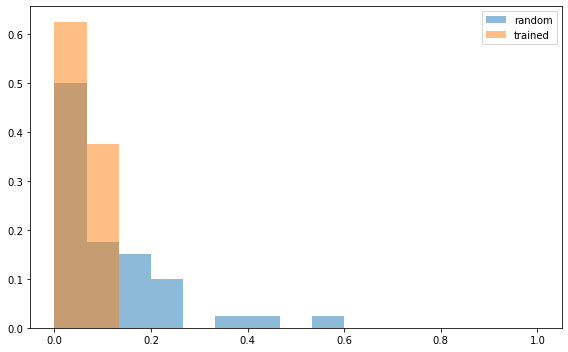

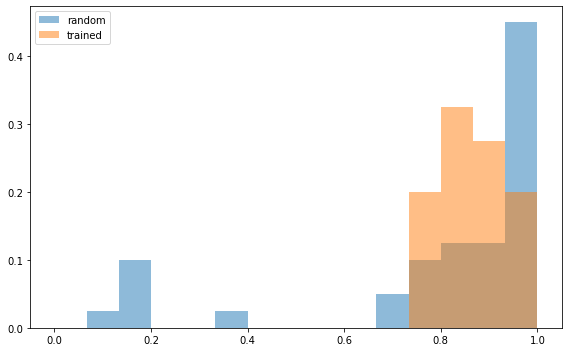

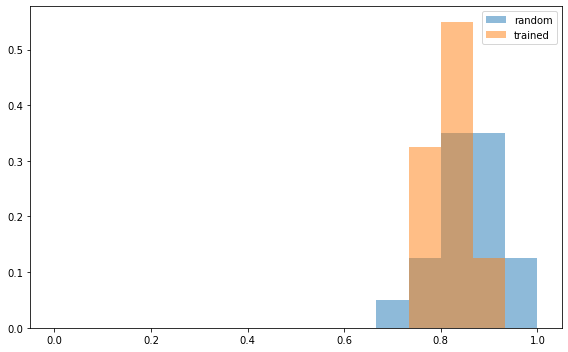

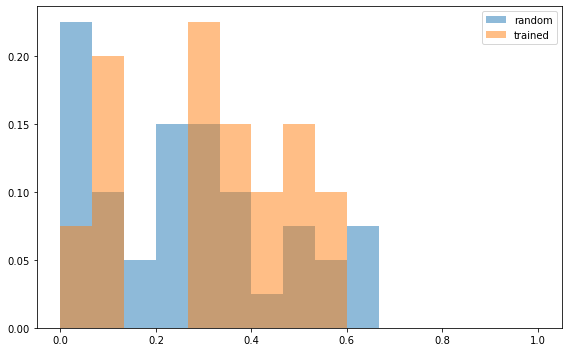

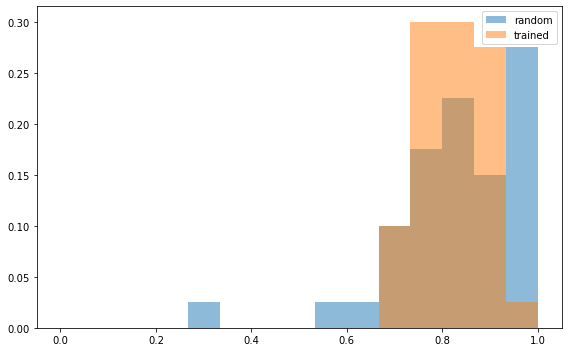

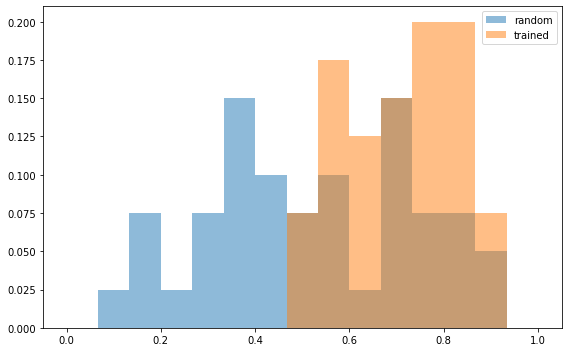

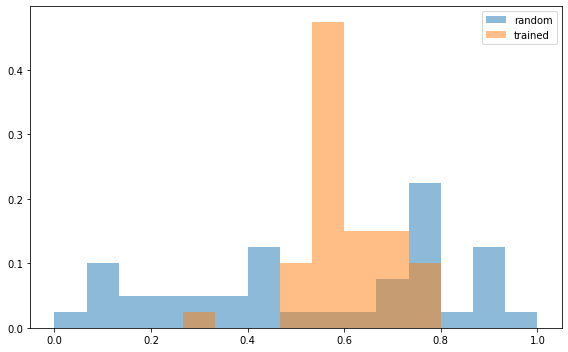

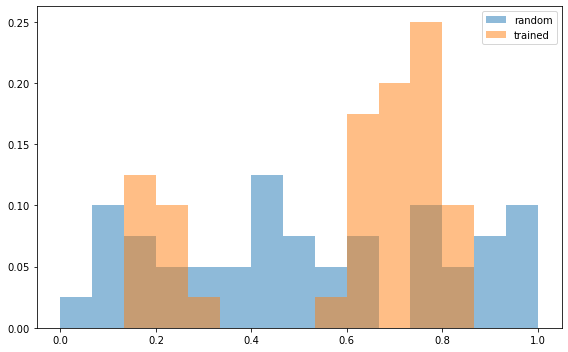

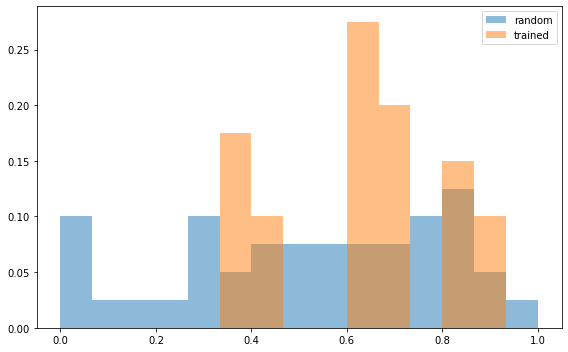

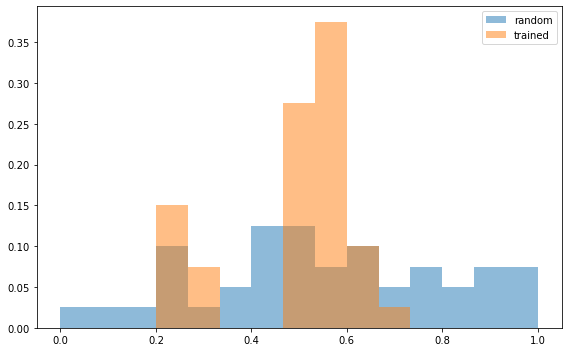

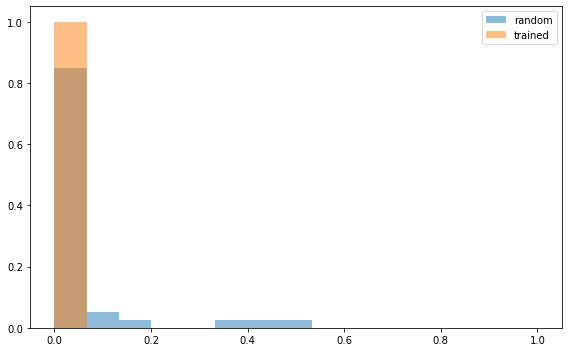

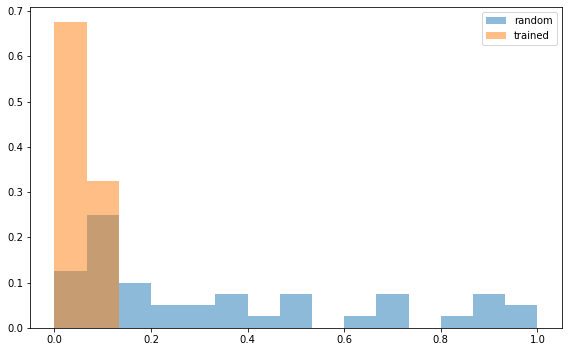

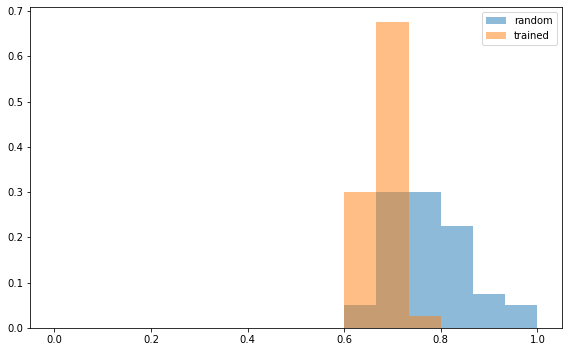

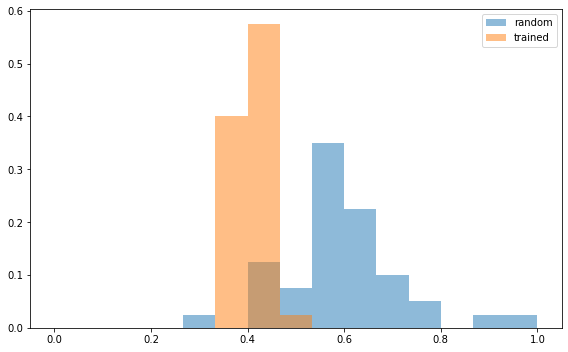

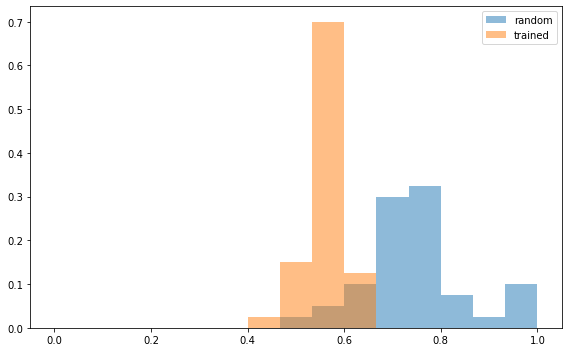

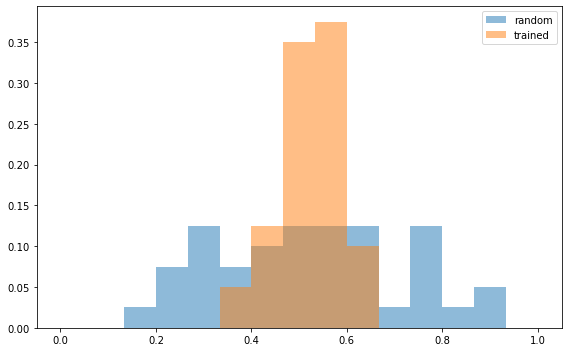

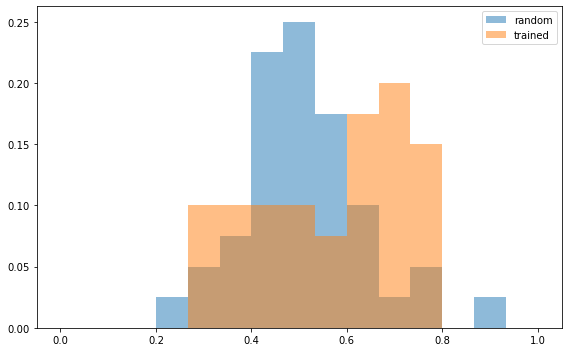

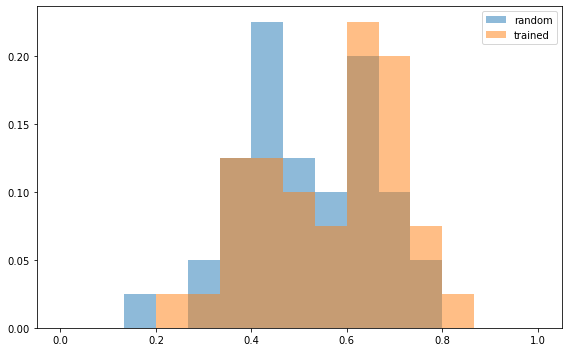

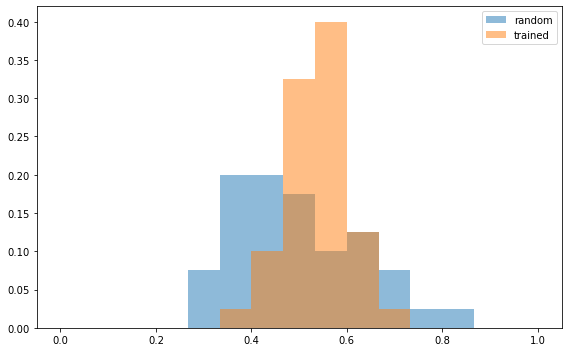

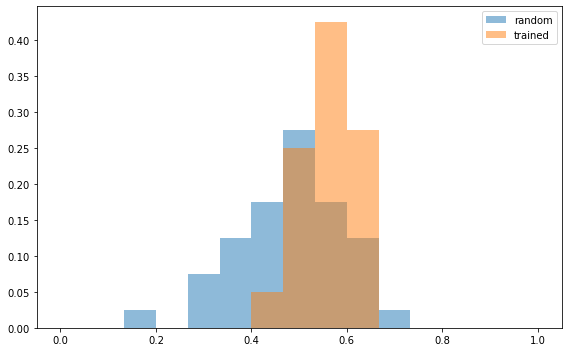

In [6]:
SHOW_TITLE = 0
SHOW_LEGEND = 1
ALPHA = .5
BINS = 15
for m in MODELS:
    for c in CONTEXTS:
        for l in LANGS:
            key1 = f"{l}_{m}"
            key2 = ('both', c)
            a,b = get_samples(key1)

            fig, ax = plt.subplots()
            fig.set_size_inches(8, 5)

            ax.hist(a[key2], weights=np.ones_like(a[key2])/float(len(a[key2])), 
                    range=(0,1), label='random', alpha=ALPHA, bins=BINS)
            ax.hist(b[key2], weights=np.ones_like(b[key2])/float(len(b[key2])), 
                    range=(0,1), label='trained', alpha=ALPHA, bins=BINS)

            if SHOW_TITLE:  plt.suptitle(f'{m} {c} {l}')
            if SHOW_LEGEND: plt.legend()
            fig.tight_layout()
            plt.savefig(f'pic_{m}_{c}_{l}.png'.replace('>','_vs_'))
            plt.show()
